[[[ 76  51  74]
  [ 76  55  71]
  [ 79  48  66]
  ...
  [171 153  72]
  [169 151  73]
  [170 151  74]]

 [[ 77  54  77]
  [ 77  54  76]
  [ 73  69  66]
  ...
  [168 147  72]
  [161 154  69]
  [163 153  70]]

 [[ 82  49  87]
  [ 78  65  83]
  [ 76  74  75]
  ...
  [168 146  68]
  [162 152  64]
  [164 152  64]]

 ...

 [[124 105  54]
  [104  95  53]
  [ 89  91  36]
  ...
  [107 112  63]
  [ 93 109  61]
  [ 99 110  61]]

 [[118  91  50]
  [ 98  87  45]
  [ 85  79  32]
  ...
  [104 113  71]
  [ 89 110  68]
  [ 96 111  67]]

 [[122  94  43]
  [102  90  38]
  [ 89  82  26]
  ...
  [104 111  75]
  [ 90 109  71]
  [ 96 110  69]]]


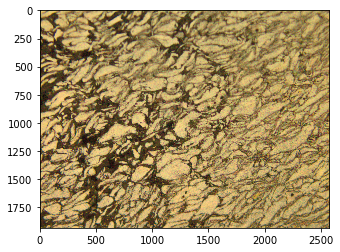

In [3]:
#Загрузка фоторграфий поверхности материала, выполненных с помощью оптического микроскопа Олимпус
import matplotlib.pyplot as plt
import numpy as np
imag = plt.imread('F2_x20_1_tsentr_verkhniy_ryadom_s_Cu.tif')
print(imag)
plt.imshow(imag)

[[201 202 193 ... 396 393 395]
 [208 207 208 ... 387 384 386]
 [218 226 225 ... 382 378 380]
 ...
 [283 252 216 ... 282 263 270]
 [259 230 196 ... 288 267 274]
 [259 230 197 ... 290 270 275]]


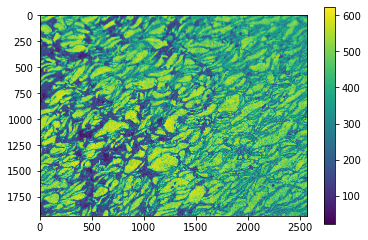

In [4]:
#Перевод трехмерного массива в двумерный, где срезаны данные отвечающие цвету
imag = np.dot(imag[...,:3],[1,1,1])
print(imag)
plt.imshow(imag)
plt.colorbar()



[[  1   1   1 ... 396 393 395]
 [  1   1   1 ... 387 384 386]
 [  1   1   1 ... 382 378 380]
 ...
 [  1   1   1 ...   1   1   1]
 [  1   1   1 ...   1   1   1]
 [  1   1   1 ...   1   1   1]]


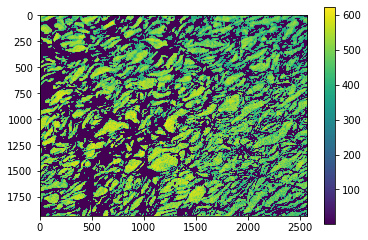

In [5]:
#Очевидно, что границы между зернами сплава отображены как темные пигменеты (исходя из оригиналного цвета)
#тогда для более высокой контрастности изображения имеет смысл избавится от цвета границ зерен
for i in imag:
    for j in range(len(i)):
        if i[j] < 350:#все что ниже 350 (RGB), в единицу (примерно)
            i[j] = 1
            
print(imag)
plt.imshow(imag)
plt.colorbar()

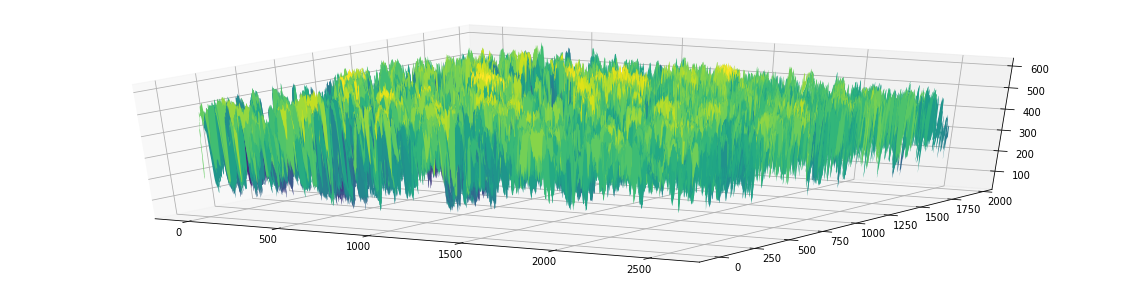

In [14]:
#Трехмерное избражение поверхности, выполненное с учетом данных цвета (RGB)
#Здесь оси Х и У это шейпы массива, а Z - значечения для цвета
# Как итог, имеется трехмерное изображение поверхности (разуммется условное, т.к. все опираеется на данные отвечающие цвету), лишенные некоторого физического фундумента
#Отмечу, что такое изображение странным образом напоминает изображения которые обычно получаются на профилометре
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import matplotlib.pyplot as plt
import numpy as np
imag = plt.imread('F2_x20_1_tsentr_verkhniy_ryadom_s_Cu.tif')
imag = np.dot(imag[...,:3],[1,1,1])

fig = plt.figure(figsize = (20, 5))
ax = fig.gca(projection='3d')

x = np.arange(0, imag.shape[1], 1)
y = np.arange(0, imag.shape[0], 1)

X, Y = np.meshgrid(x, y)

imag = np.array(imag)

ax.plot_surface(X, Y, imag, cmap='viridis')



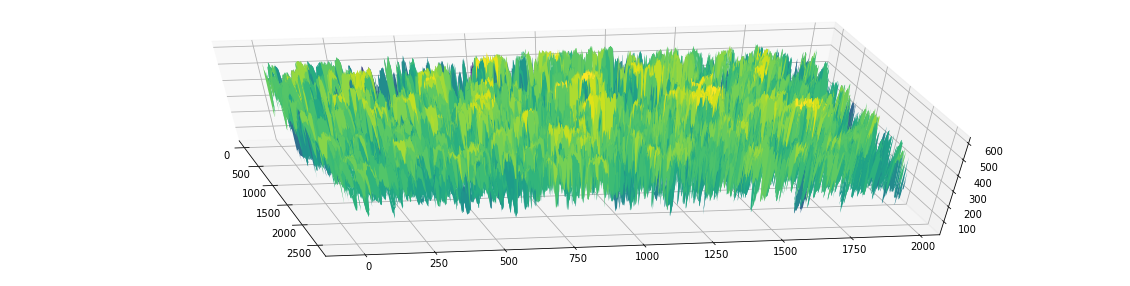

In [24]:
#Выполнен поворот на определенное значение угла (в данном случае на 10 градусов по часовой стрелке, и наклонено на 60 градусов)
fig = plt.figure(figsize = (20, 5))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, imag, cmap='viridis')
ax.view_init(50, -10)  # поворот

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  """


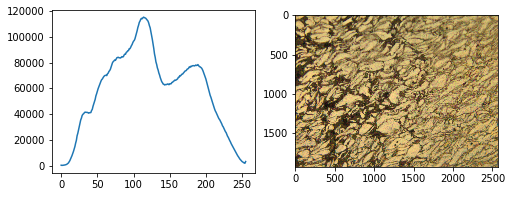

In [12]:
#Гистрграмма по цветам для оригинальных изображений (использовался сторонний модуль skimage)
#с помощью данной функции предполагалось некоторым образом, получить количество зерен.
#Однако, по всей видимости такой подход приводит в тупик 
from skimage import data
from skimage.exposure import histogram
imag = plt.imread('F2_x20_1_tsentr_verkhniy_ryadom_s_Cu.tif')
hist, hist_centers = histogram(imag)
fig, ax = plt.subplots(1,2, figsize = (8, 3))
ax[0].plot(hist_centers, hist)
ax[1].imshow(imag)

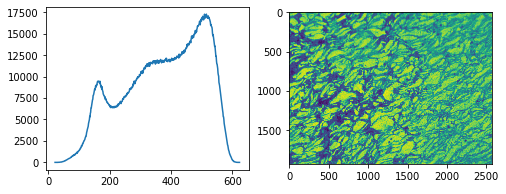

In [11]:
#Гистрграмма по цветам для изображений избавлеенных от цвета
from skimage import data
from skimage.exposure import histogram
imag = plt.imread('F2_x20_1_tsentr_verkhniy_ryadom_s_Cu.tif')
imag = np.dot(imag[...,:3],[1,1,1])
hist, hist_centers = histogram(imag)
fig, ax = plt.subplots(1,2, figsize = (8, 3))
ax[0].plot(hist_centers, hist)
ax[1].imshow(imag)